In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = "data/"

In [31]:
# loading data
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

In [32]:
def plot_boxplox(data_time, data_temp, labels, title):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    bp = ax1.boxplot(data_time, labels=labels, notch=True, bootstrap=10000)
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='b')
    
    ax2 = ax2.twinx()
    bp = ax2.boxplot(data_temp, labels=labels, notch=True, bootstrap=10000)
    ax2.set_ylabel('temperature (°C)', color='r', )
    ax2.tick_params('y', colors='r')
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='r')
        
    plt.show()

In [33]:
def plot_data(timestamp, time, temp, title):
    fig, ax1 = plt.subplots()

    maxtime = timestamp[-1:]

    ax1.plot(timestamp, time, 'b-')
    ax1.set_xlabel('experiment time (min) - (duration: %.2f min)' %(maxtime))
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
   

    ax2 = ax1.twinx()
    ax2.plot(timestamp, temp, 'r')
    ax2.set_ylabel('temperature (°C)', color='r')
    ax2.tick_params('y', colors='r')
    
    ax1.set_title(title)

    plt.show()

In [34]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


In [35]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


In [36]:
path_4b = "data/performance/raspberry_pi/buster/4B"

**Standard Raspbian Kernel**

In [37]:
# rPi 4B std - loading data standard raspbian kernel

kernel_std_4b_mt = load_csv_data("std_kernel_4B_multithread_output.csv", path_4b)
kernel_std_4b_mt['time'] -= kernel_std_4b_mt['time'][0]

kernel_std_4b_st = load_csv_data("std_kernel_4B_singlethread_output.csv", path_4b)
kernel_std_4b_st['time'] -= kernel_std_4b_st['time'][0]

**Preempt-RT Raspbian Kernel**

In [44]:
# rPi 4B  - loading data preempt-rt raspbian kernel

kernel_rt_4b_mt = load_csv_data("rt_kernel_4B_multithread_output.csv", path_4b)
kernel_rt_4b_mt['time'] -= kernel_rt_4b_mt['time'][0]

kernel_rt_4b_st = load_csv_data("rt_kernel_4B_singlethread_output.csv", path_4b)
kernel_rt_4b_st['time'] -= kernel_rt_4b_st['time'][0]

**Standard Raspbian Kernel 4.19.57-v7+**

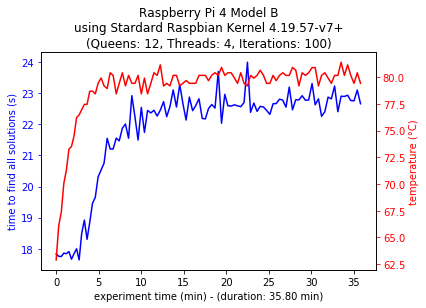

In [39]:
# rPi 4B MT - plotting standard raspbian kernel
timestamp_std_4b_mt = kernel_std_4b_mt.time/60
time_std_4b_mt = kernel_std_4b_mt.seconds + kernel_std_4b_mt.microseconds/1000000
temp_std_4b_mt = (kernel_std_4b_mt.cpu_temp + kernel_std_4b_mt.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.57-v7+\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_std_4b_mt[:99], time_std_4b_mt[:99], temp_std_4b_mt[:99], title)

In [40]:
print("Time to 45 iterations: %.2f s" %timestamp_std_4b_mt[44])

Time to 45 iterations: 15.28 s


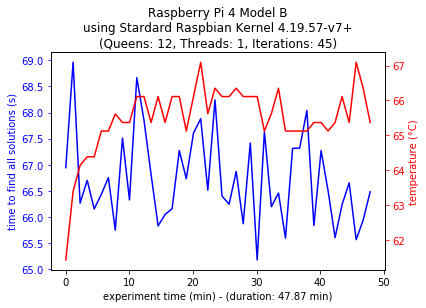

In [45]:
# rPi 4B ST - plotting standard raspbian kernel

timestamp_std_4b_st = kernel_std_4b_st.time/60
time_std_4b_st = kernel_std_4b_st.seconds + kernel_std_4b_st.microseconds/1000000
temp_std_4b_st = (kernel_std_4b_st.cpu_temp + kernel_std_4b_st.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.57-v7+\n(Queens: 12, Threads: 1, Iterations: 45)"
plot_data(timestamp_std_4b_st[:44], time_std_4b_st[:44], temp_std_4b_st[:44], title)

In [42]:
print("Time to 45 iterations: %.2f s" %timestamp_std_4b_st[44])

Time to 45 iterations: 48.98 s


**Preempt-RT Raspbian Kernel 4.19.59-rt23-v7l+**

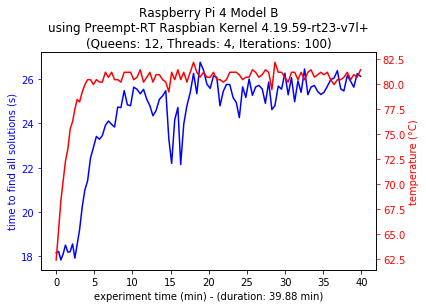

In [46]:
# rPi 4B MT - plotting preempt-rt raspbian kernel
timestamp_rt_4b_mt = kernel_rt_4b_mt.time/60
time_rt_4b_mt = kernel_rt_4b_mt.seconds + kernel_rt_4b_mt.microseconds/1000000
temp_rt_4b_mt = (kernel_rt_4b_mt.cpu_temp + kernel_rt_4b_mt.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Preempt-RT Raspbian Kernel 4.19.59-rt23-v7l+\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_rt_4b_mt[:99], time_rt_4b_mt[:99], temp_rt_4b_mt[:99], title)

In [48]:
print("Time to 45 iterations: %.2f s" %timestamp_rt_4b_mt[44])

Time to 45 iterations: 16.72 s


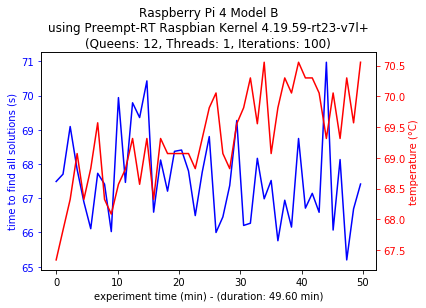

In [51]:
# rPi 4B ST - plotting preempt-rt raspbian kernel
timestamp_rt_4b_st = kernel_rt_4b_st.time/60
time_rt_4b_st = kernel_rt_4b_st.seconds + kernel_rt_4b_st.microseconds/1000000
temp_rt_4b_st = (kernel_rt_4b_st.cpu_temp + kernel_rt_4b_st.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Preempt-RT Raspbian Kernel 4.19.59-rt23-v7l+\n(Queens: 12, Threads: 1, Iterations: 100)"

plot_data(timestamp_rt_4b_st[:99], time_rt_4b_st[:99], temp_rt_4b_st[:99], title)

In [52]:
print("Time to 45 iterations: %.2f s" %timestamp_rt_4b_st[44])

Time to 45 iterations: 49.60 s


**Comparison**

In [54]:
# multi-thread vs single-thread
mt_timing_rt_4b = (time_rt_4b_st[:44,None]/time_rt_4b_mt[:44,None])

print("Multi-thread rt 4B: %.2f s" % (np.mean(mt_timing_rt_4b)))
print("Multi-thread rt 4B: %.2f s" % (np.mean(time_rt_4b_mt)))
print("Single-thread rt 4B: %.2f s" % (np.mean(time_rt_4b_st)))

max_rt_mt_4b_temp = np.max(temp_rt_4b_mt)
max_rt_st_4b_temp = np.max(temp_rt_4b_st)

print("Max. temp. rt: %.2f °C" % (max_rt_mt_4b_temp))
print("Max. temp. rt: %.2f °C" % (max_rt_st_4b_temp))

Multi-thread rt 4B: 3.04 s
Multi-thread rt 4B: 24.27 s
Single-thread rt 4B: 67.55 s
Max. temp. rt: 82.16 °C
Max. temp. rt: 70.56 °C


In [55]:
mt_timing_rt_std_4b = time_rt_4b_mt[:99,None]/time_std_4b_mt[:99,None]
st_timing_rt_std_4b = time_rt_4b_st[:44,None]/time_std_4b_st[:44,None]

print("RT 4B MT: %.2f" % (np.mean(mt_timing_rt_std_4b)))
print("RT 4B ST: %.2f" % (np.mean(st_timing_rt_std_4b)))



RT 4B MT: 1.11
RT 4B ST: 1.01
